# Random Forest Modeling of Blood Transfusion Data
In this project, we implement Random Forest models on blood transfusion data to predict whether an individual donates blood or not in March 2007. 

### Data Source
The data is taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The data is a multivariate data comprising of 5 attributes and 748 donor observations.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("transfusion.data", sep = ",")
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


Each of the 748 donor data points include Recency (months since last donation), Frequency (total number of donation), Monetary (total blood donated in c.c.), Time (months since first donation) and a Target binary variable representing whether he/she donated blood in March 2007 (1: for donating blood, 0: for not donating blood).

In [3]:
print(data.dtypes)
print(data.shape[0])

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object
748


In [4]:
inputs = data.rename(columns={'Recency (months)': 'Recency', 'Frequency (times)': 'Frequency', 
                                'Monetary (c.c. blood)':'Monetary', 'Time (months)': 'Time', 
                               'whether he/she donated blood in March 2007': 'Target'})
print(inputs)

     Recency  Frequency  Monetary  Time  Target
0          2         50     12500    98       1
1          0         13      3250    28       1
2          1         16      4000    35       1
3          2         20      5000    45       1
4          1         24      6000    77       0
..       ...        ...       ...   ...     ...
743       23          2       500    38       0
744       21          2       500    52       0
745       23          3       750    62       0
746       39          1       250    39       0
747       72          1       250    72       0

[748 rows x 5 columns]


Some descriptive statistics of the attributes in the data

In [5]:
data_new = inputs.drop('Target', axis = 'columns')
Target = inputs['Target']

desc_stats = data_new.describe()
desc_stats.rename({'50%': 'median'}, inplace=True)
desc_stats

,Recency,Frequency,Monetary,Time
count,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086
std,8.095396,5.839307,1459.826781,24.376714
min,0.000000,1.000000,250.000000,2.000000
25%,2.750000,2.000000,500.000000,16.000000
median,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,50.000000
max,74.000000,50.000000,12500.000000,98.000000


In [6]:
inputs.Target.value_counts()

0    570
1    178
Name: Target, dtype: int64

In [7]:
inputs.groupby('Target').mean()

,Recency,Frequency,Monetary,Time
Target,,,,
0,10.771930,4.801754,1200.438596,34.770175
1,5.455056,7.797753,1949.438202,32.719101


- On average, for people that donated blood in March 2007, 
    - it took 32 months after first donation, 
    - total blood donated in c.c. of 1949, 
    - total number of donation of approximately 8 times and  
    - 5 months since last donation. 

- Likewise, for people that did not donate blood in March 2007, 
    - it took 34 months after first donation, 
    - total blood donated in c.c. of 1200, 
    - total number of donation of approximately 5 times and 
    - 10 months since last donation.

In [8]:
inputs.groupby('Target').median()

,Recency,Frequency,Monetary,Time
Target,,,,
0,11.0,3.0,750.0,28.0
1,4.0,6.0,1500.0,28.0


### Examining Distribution of Blood Transfusion Data Attributes
Make a histogram and density plot of the four (4) features.

/Users/paa.willie/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Months since last donation'}, xlabel='Recency', ylabel='Frequency'>

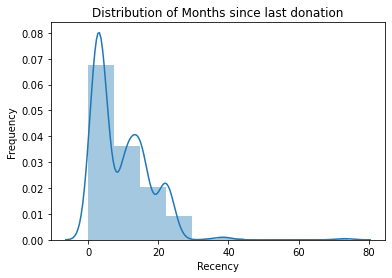

In [9]:
ax = plt.axes()
ax.set(xlabel='Recency (months)', ylabel='Frequency', title='Distribution of Months since last donation');
sns.distplot(inputs.Recency, bins=10)

/Users/paa.willie/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Total Number of Donation'}, xlabel='Frequency', ylabel='Frequency'>

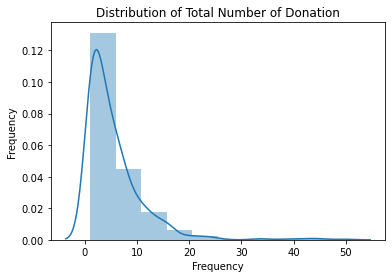

In [10]:
ax = plt.axes()
ax.set(xlabel='Frequency(months)', ylabel='Frequency', title='Distribution of Total Number of Donation');
sns.distplot(inputs.Frequency, bins=10)

/Users/paa.willie/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Total Blood Donated in c.c.'}, xlabel='Frequency', ylabel='Frequency'>

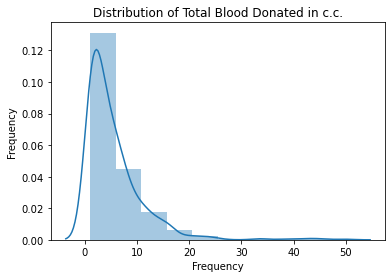

In [11]:
ax = plt.axes()
ax.set(xlabel='Monetary', ylabel='Frequency', title='Distribution of Total Blood Donated in c.c.');
sns.distplot(inputs.Frequency, bins=10)

/Users/paa.willie/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Months Since First Donation'}, xlabel='Time', ylabel='Frequency'>

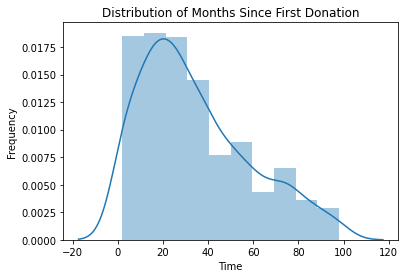

In [12]:
ax = plt.axes()
ax.set(xlabel='Time', ylabel='Frequency', title='Distribution of Months Since First Donation');
sns.distplot(inputs.Time, bins=10)

#### Hexbin Plots of Attributes VS Target Variable

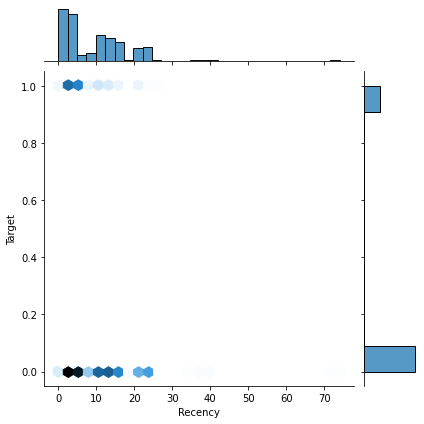

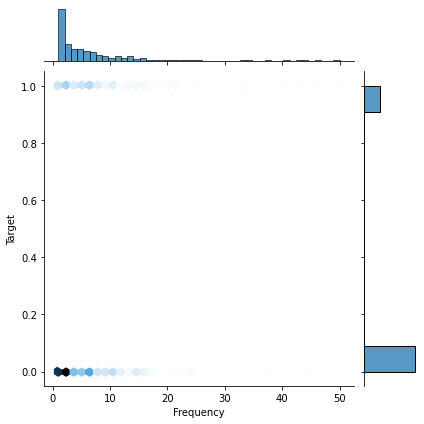

In [13]:
print(sns.jointplot(x = inputs['Recency'], y = inputs['Target'], kind = 'hex'))
print(sns.jointplot(x = inputs['Frequency'], y = inputs['Target'], kind = 'hex'))

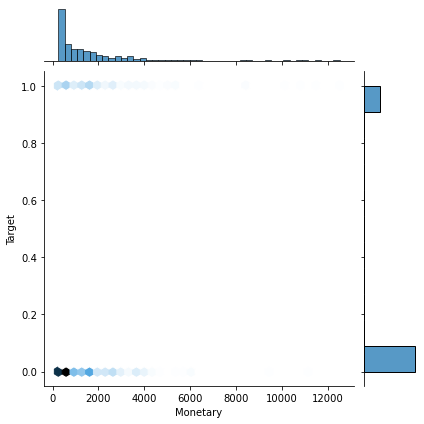

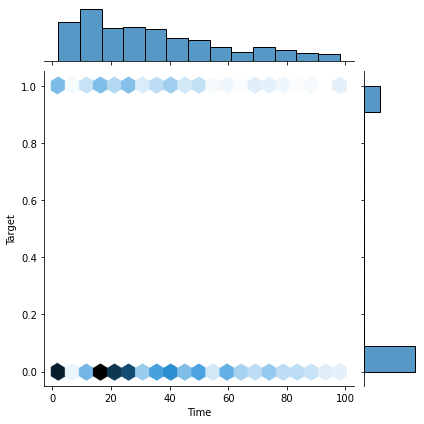

In [14]:
print(sns.jointplot(x = inputs['Monetary'], y = inputs['Target'], kind = 'hex'))
print(sns.jointplot(x = inputs['Time'], y = inputs['Target'], kind = 'hex'))

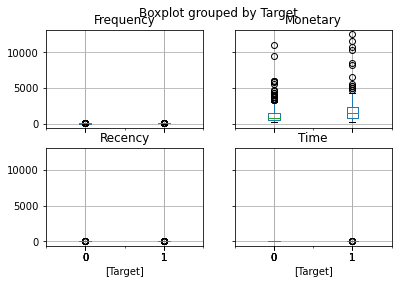

In [15]:
inputs.boxplot(by = 'Target');

### Modeling
Before we begin the modeling of the data, we need to split the data into training (used to fit the machine learning model) and test sets (used to evaluate the fit machine learning model). The objective is to estimate the performance of the machine learning model on new data: data not used to train the model. We split the dataset so that 67% is used to train the model and 33% is used to evaluate it. This split is chosen arbitrarily.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(inputs.drop(['Target'], axis = 'columns'), inputs.Target, test_size=0.33)
print(len(X_test))
print(len(X_train))

247
501


Now that we have successfully split our data into training and testing sets, let start defining and fitting the model on the training dataset.

##### 1. Random Forest Model
This model is an ensemble of decision tree models. It combines many decision trees and a vote is casted at the final level to make a decision. This makes it more robust as compared to the decision tree model. 

In [17]:
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier(random_state = 1)
RFC_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

Then use the fit model to make predictions and evaluate the predictions using the classification accuracy performance metric.

In [18]:
y_pred = RFC_model.predict(X_test)

In [19]:
RFC_model.score(X_test, y_test)

0.7206477732793523

The random forest model is evaluated on the test set and its performance when making predictions on new data has an accuracy of about 73%. Now, let's examine the confusion matrix to observe the true negatives and true positives.

Text(15.0, 0.5, 'Actual')

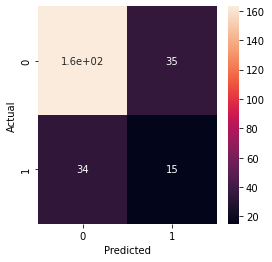

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (4, 4))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [21]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print(f'True Positives: {TP}')
print(f'False Positives: {FP}')
print(f'True Negatives: {TN}')
print(f'False Negatives: {FN}')

True Positives: 15
False Positives: 35
True Negatives: 163
False Negatives: 34


##### Sensitivy (or Recall or TPR)
Now that we know the measures above we can measure the proportion of the actual positives that are accurately identified using the formula 
TP/(TP + FN). 

##### False Positive Rate (FPR)
We can also measure the proportion of the false positives and the total number of actual negatives using the formula FP/(FP + TN). 

##### ROC CURVE
We use the codes below to select the probabilities of the positive class only and write a function to convert the predictions according to some given thresholds. Finally, we create a list of TPRs and FPRs at varying thresholds and plot our Reciever Operating Characteristic or ROC curve. The ROC curve provides a visualization plot of TRP v FPR at various classification thresholds from 0 to 1. 

In [22]:
probs = RFC_model.predict_proba(X_test)[:, 1]

In [23]:
def conv_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]

In [24]:
ROC_vals = []
for threshold in np.linspace(0, 1, 50):
    preds = conv_preds(threshold, probs)
    TN, FP, FN, TP = confusion_matrix(y_test, preds).ravel()
    TPR = TP/(TP + FN)
    FPR = FP/(FP + TN)
    ROC_vals.append([TPR, FPR])
TPR_vals, FPR_vals = zip(*ROC_vals)

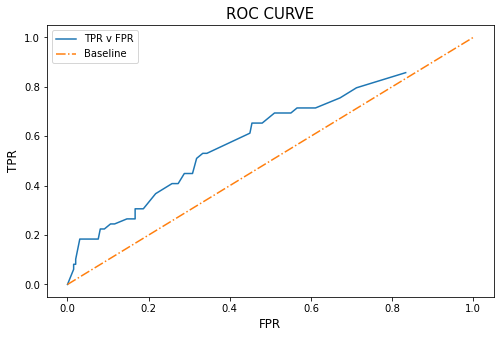

In [25]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(FPR_vals, TPR_vals, label = 'TPR v FPR')
ax.plot(np.linspace(0, 1, 50), np.linspace(0, 1, 50), label = 'Baseline', linestyle = '-.')
plt.title('ROC CURVE', fontsize = 15)
plt.xlabel('FPR', fontsize = 12)
plt.ylabel('TPR', fontsize = 12)
plt.legend(fontsize = 10);


In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds)

0.5

##### Discussion
The random forest model tells us that of 191 people that actually did not donate blood in March of 2007, we predicted 162 people did not donate blood correctly. This means that we were correct 85% of the time in predicting whether a person donated blood or not in March 2007. Also, out of 57 people that actually donated blood in March 2007, we predicted correctly only 33% of the time. The score is closer to 0.5 indicating that the Random Forest Model performs as badly as a coin flip. In conclusion, this model performs badly with the blood transfusion data. Perhaps the same model with different parameters or a different classification model will perform better.

### Random Forest Hyperparameters
Using the scikit-learn API to evaluate and use random forest ensembles did not give the best results, so let’s look at configuring the model by tuning some of the hyperparameters of the random forest model and its effect on model performance.

###### Number of Samples
In the previous model, we used the whole training data to train the decision tree. i.e. the bootstrap argument is set to False. We will turn the bootstrap argument on so that each decision tree in the ensemble is fit on a bootstrap sample drawn form the training data. 
We are gonna utilize different bootstrap samples from 10% to 100% on the random forest algorithm to examine our model.

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

The function below gets a list of models to evaluate 

In [28]:
def diff_models():
    models = dict()
    
    # ratios from 10% to 100% in increments of 10%
    for i in np.arange(0.1, 1.1, 0.1):
        label = '%.1f' % i
        
        # if max_samples=None use 100% 
        if i == 1.0:
            i = None
        models[label] = RandomForestClassifier(max_samples = i)
    return models

The function below evaluates a model using cross-validation

In [29]:
# accuracy scoring and n_jobs=-1 means use all processors
def eval_model(model, data_new, Target):
    ev = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 4, random_state = 2)
    scores = cross_val_score(model, data_new, Target, scoring = 'accuracy', cv = ev, n_jobs = -1)
    return scores

0.1 -> 0.79
0.2 -> 0.78
0.3 -> 0.77
0.4 -> 0.77
0.5 -> 0.76
0.6 -> 0.76
0.7 -> 0.75
0.8 -> 0.74
0.9 -> 0.74
1.0 -> 0.74


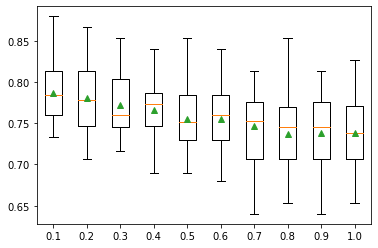

In [30]:
models = diff_models()
results, names = list(), list()
for j, model in models.items():
    scores = eval_model(model, data_new, Target)
    results.append(scores)
    names.append(j)
    print('%s -> %.2f' % (j, np.mean(scores))) 
plt.boxplot(results, labels = names, showmeans = True)
plt.show()

Our results suggest that using a bootstrap sample size that is equal to 10% of the training data gives the best results of approximately 80% accuracy. The boxplot above also depict the distribution of accuracy scores for each sample size of the bootstrap.

###### Number of Features
In this subsection, we carry-out the modeling by configuring random forest model using the most important features from the number of features that is randomly sampled for each split point. We'll explore number of features from 1 to 4. 

In [31]:
def diff_models1():
    models = dict()
    
    # number of features from 1 to 4
    for i in range(1, 5):
        models[str(i)] = RandomForestClassifier(max_features = i)
    return models

1 -> 0.74  0.042
2 -> 0.74  0.043
3 -> 0.73  0.045
4 -> 0.73  0.049


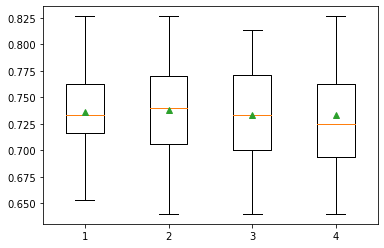

In [32]:
models = diff_models1()
results, names = list(), list()
for j, model in models.items():
    scores = eval_model(model, data_new, Target)
    results.append(scores)
    names.append(j)
    print('%s -> %.2f  %.3f' % (j, np.mean(scores), np.std(scores))) 

# comparison of model performance
plt.boxplot(results, labels = names, showmeans = True)
plt.show()

###### Number of Trees
Another hyperparameter for configuring random forest is the number of trees. Given the stochastic nature of the learning algorithm of random forest, it is somewhat immune to overfitting the training set. In the code below, we explore the effects of changes in the number of trees on the random forest model. 

In [33]:
def diff_models2():
    models = dict()
    
    # number of trees from 10 to 500
    num_trees = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
    for i in num_trees:
        models[str(i)] = RandomForestClassifier(n_estimators = i)
    return models

10 -> 0.74  0.049
50 -> 0.74  0.046
100 -> 0.74  0.040
150 -> 0.73  0.044
200 -> 0.74  0.042
250 -> 0.73  0.039
300 -> 0.73  0.043
350 -> 0.74  0.046
400 -> 0.74  0.044
450 -> 0.74  0.044
500 -> 0.73  0.042


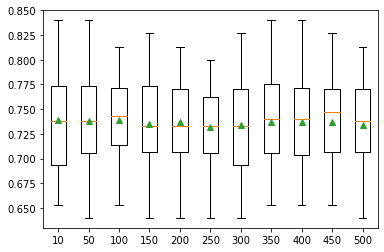

In [35]:
models = diff_models2()
results, names = list(), list()
for j, model in models.items():
    scores = eval_model(model, data_new, Target)
    results.append(scores)
    names.append(j)
    print('%s -> %.2f  %.3f' % (j, np.mean(scores), np.std(scores))) 

# comparison of model performance
plt.boxplot(results, labels = names, showmeans = True)
plt.show()

We observe that the accuracy fluctuates between 73% and 74%. There's not a lot of fluctuations in accuracy based on the number of trees used.

###### Depth of Trees
The maximum depth of trees used in the ensemble is also important. By default, trees are not pruned but are constructed to any arbitrary depth. Let examine the results we get from fixing a depth for the trees.

In [36]:
def diff_models3():
    models = dict()
    
    # number of trees from 10 to 500
    depths = [i for i in range(1, 5)] + [None]
    for i in depths:
        models[str(i)] = RandomForestClassifier(max_depth = i)
    return models

1 -> 0.76  0.004
2 -> 0.76  0.010
3 -> 0.77  0.023
4 -> 0.79  0.029
None -> 0.74  0.044


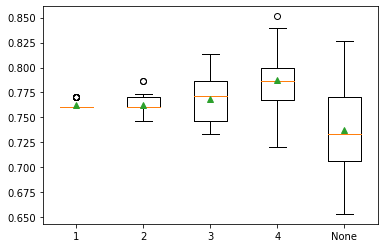

In [37]:
models = diff_models3()
results, names = list(), list()
for j, model in models.items():
    scores = eval_model(model, data_new, Target)
    results.append(scores)
    names.append(j)
    print('%s -> %.2f  %.3f' % (j, np.mean(scores), np.std(scores))) 
 
# comparison of model performance
plt.boxplot(results, labels = names, showmeans = True)
plt.show()

We observe an improvement in the performance of the model with increase in tree depth to 4. This supports the default of fixing no maximum depth.

#### Reference
Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM 
model using Bernoulli sequence, "Expert Systems with Applications, 2008 
(doi:10.1016/j.eswa.2008.07.018).